# Liquor Sales Analysis Project

## Importing packages and Loading dataset: 

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import datetime as dt

In [4]:
import matplotlib.pyplot as plt
import seaborn as sn

In [106]:
#Loading dataset
df=pd.read_csv('Iowa_Liquor_Sales.csv', low_memory=False)
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,6,$162.84,4.50,1.19
1,S29195400002,11/21/2015,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,12,$325.68,9.00,2.38
2,S29050300001,11/16/2015,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
3,S28867700001,11/04/2015,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,...,237,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,3,$160.02,5.25,1.39
4,S29050800001,11/17/2015,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08


In [107]:
df.shape #checking shape of dataframe

(12591077, 24)

## Extracting data for the year 2015:

Since the data has 12 million records for sales data, we will filter the data and only work with data from the year 2015 for analysis purpose of this project. 

In [108]:
df['Date']=pd.to_datetime(df['Date'])   #converting type of 'Date' column to Datetime datatype
df['year']=df['Date'].dt.strftime('%Y') #extracting the year from the date as a new column

df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),year
0,S29198800001,2015-11-20,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,...,Templeton Rye w/Flask,6,750,$18.09,$27.14,6,$162.84,4.50,1.19,2015
1,S29195400002,2015-11-21,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,...,Templeton Rye w/Flask,6,750,$18.09,$27.14,12,$325.68,9.00,2.38,2015
2,S29050300001,2015-11-16,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,...,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08,2015
3,S28867700001,2015-11-04,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,...,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,3,$160.02,5.25,1.39,2015
4,S29050800001,2015-11-17,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,...,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08,2015


In [111]:
df1=df[df['year']=='2015'] #filtering data from the year 2015
df1.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),year
0,S29198800001,2015-11-20,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,...,Templeton Rye w/Flask,6,750,$18.09,$27.14,6,$162.84,4.50,1.19,2015
1,S29195400002,2015-11-21,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,...,Templeton Rye w/Flask,6,750,$18.09,$27.14,12,$325.68,9.00,2.38,2015
2,S29050300001,2015-11-16,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,...,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08,2015
3,S28867700001,2015-11-04,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,...,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,3,$160.02,5.25,1.39,2015
4,S29050800001,2015-11-17,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,...,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08,2015


In [112]:
df1.shape

(2184483, 25)

In [113]:
df1.to_csv('new_iowa_liquor_dataset.csv') #saving our new dataframe in a csv file for reference

In [5]:
df1=pd.read_csv('new_iowa_liquor_dataset.csv', low_memory=False) #creating an intermediary starting point for performing EDA

# EDA:

## Data Cleaning and Transformation:

In [6]:
#Soring the data by date 

df1=df1.sort_values(by=['Date'], ascending=True, ignore_index=True)
df1.head()

,Unnamed: 0,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,...,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),year
0,4586863,S23318600032,2015-01-05,2605,Hy-Vee Drugstore #5 / Cedar Rapids,2001 BLAIRS FERRY ROAD NE,CEDAR RAPIDS,52402,2001 BLAIRS FERRY ROAD NE\nCEDAR RAPIDS 52402\...,57.0,...,Remy Martin Vsop Cognac,24,200,$5.42,$8.13,4,$32.52,0.8,0.21,2015
1,1914624,S23297400146,2015-01-05,4794,Smokin' Joe's #17 Tobacco and Liquor,110 S ROOSEVELT HWY 61,BURLINGTON,52601,110 S ROOSEVELT HWY 61\nBURLINGTON 52601\n(40....,29.0,...,Hawkeye Vodka 80 Prf Mini,12,500,$3.73,$5.60,2,$11.20,1.0,0.26,2015
2,4934717,S23317400077,2015-01-05,2190,"Central City Liquor, Inc.",1460 2ND AVE,DES MOINES,50314,"1460 2ND AVE\nDES MOINES 50314\n(41.60566, -93...",77.0,...,Crown Royal Black,12,750,$17.00,$25.50,2,$51.00,1.5,0.40,2015
3,164336,S23286600002,2015-01-05,3886,Wal-Mart 0646 / Anamosa,101 115 ST,ANAMOSA,52205,"101 115 ST\nANAMOSA 52205\n(42.101677, -91.264...",53.0,...,Admiral Nelson Spiced Rum,6,1750,$11.55,$17.33,12,$207.96,21.0,5.55,2015
4,1915007,S23280600025,2015-01-05,2962,Dahl's / Johnston,5440 NW 86TH ST,JOHNSTON,50131,"5440 NW 86TH ST\nJOHNSTON 50131\n(41.659093, -...",77.0,...,Three Olives Raspberry Vodka,12,750,$9.96,$14.94,2,$29.88,1.5,0.40,2015


In [7]:
#Creating new column for Month of sales
df1['Date']=pd.to_datetime(df1['Date'])
df1['month']=df1['Date'].dt.strftime('%B')
df1.head()

,Unnamed: 0,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,...,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),year,month
0,4586863,S23318600032,2015-01-05,2605,Hy-Vee Drugstore #5 / Cedar Rapids,2001 BLAIRS FERRY ROAD NE,CEDAR RAPIDS,52402,2001 BLAIRS FERRY ROAD NE\nCEDAR RAPIDS 52402\...,57.0,...,24,200,$5.42,$8.13,4,$32.52,0.8,0.21,2015,January
1,1914624,S23297400146,2015-01-05,4794,Smokin' Joe's #17 Tobacco and Liquor,110 S ROOSEVELT HWY 61,BURLINGTON,52601,110 S ROOSEVELT HWY 61\nBURLINGTON 52601\n(40....,29.0,...,12,500,$3.73,$5.60,2,$11.20,1.0,0.26,2015,January
2,4934717,S23317400077,2015-01-05,2190,"Central City Liquor, Inc.",1460 2ND AVE,DES MOINES,50314,"1460 2ND AVE\nDES MOINES 50314\n(41.60566, -93...",77.0,...,12,750,$17.00,$25.50,2,$51.00,1.5,0.40,2015,January
3,164336,S23286600002,2015-01-05,3886,Wal-Mart 0646 / Anamosa,101 115 ST,ANAMOSA,52205,"101 115 ST\nANAMOSA 52205\n(42.101677, -91.264...",53.0,...,6,1750,$11.55,$17.33,12,$207.96,21.0,5.55,2015,January
4,1915007,S23280600025,2015-01-05,2962,Dahl's / Johnston,5440 NW 86TH ST,JOHNSTON,50131,"5440 NW 86TH ST\nJOHNSTON 50131\n(41.659093, -...",77.0,...,12,750,$9.96,$14.94,2,$29.88,1.5,0.40,2015,January


In [8]:
#renaming columns for ease of use during analysis

df1.rename(columns= {'Invoice/Item Number':'Invoice',
                     'Sale (Dollars)':'Sale', 
                     'Bottle Volume (ml)':'Bottle_Volume', 
                     'Volume Sold (Liters)':'Vol_sold_liters', 
                     'Volume Sold (Gallons)':'Vol_sold_gallons'}, 
           inplace = True)

In [9]:
df1.head()

,Unnamed: 0,Invoice,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,...,Pack,Bottle_Volume,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale,Vol_sold_liters,Vol_sold_gallons,year,month
0,4586863,S23318600032,2015-01-05,2605,Hy-Vee Drugstore #5 / Cedar Rapids,2001 BLAIRS FERRY ROAD NE,CEDAR RAPIDS,52402,2001 BLAIRS FERRY ROAD NE\nCEDAR RAPIDS 52402\...,57.0,...,24,200,$5.42,$8.13,4,$32.52,0.8,0.21,2015,January
1,1914624,S23297400146,2015-01-05,4794,Smokin' Joe's #17 Tobacco and Liquor,110 S ROOSEVELT HWY 61,BURLINGTON,52601,110 S ROOSEVELT HWY 61\nBURLINGTON 52601\n(40....,29.0,...,12,500,$3.73,$5.60,2,$11.20,1.0,0.26,2015,January
2,4934717,S23317400077,2015-01-05,2190,"Central City Liquor, Inc.",1460 2ND AVE,DES MOINES,50314,"1460 2ND AVE\nDES MOINES 50314\n(41.60566, -93...",77.0,...,12,750,$17.00,$25.50,2,$51.00,1.5,0.40,2015,January
3,164336,S23286600002,2015-01-05,3886,Wal-Mart 0646 / Anamosa,101 115 ST,ANAMOSA,52205,"101 115 ST\nANAMOSA 52205\n(42.101677, -91.264...",53.0,...,6,1750,$11.55,$17.33,12,$207.96,21.0,5.55,2015,January
4,1915007,S23280600025,2015-01-05,2962,Dahl's / Johnston,5440 NW 86TH ST,JOHNSTON,50131,"5440 NW 86TH ST\nJOHNSTON 50131\n(41.659093, -...",77.0,...,12,750,$9.96,$14.94,2,$29.88,1.5,0.40,2015,January


In [10]:
#Removing unwanted column 
df1=df1.drop(columns=['Unnamed: 0', 'year'])

In [11]:
# Removing the Dollar sign from the price columns for calculation purpose

df1['Sales'] = df1['Sale'].apply(lambda s: float(str(s).split('$')[1]))
df1['State_Bottle_Cost'] = df1['State Bottle Cost'].apply(lambda s: float(str(s).split('$')[1]))
df1['State_Bottle_Retail'] = df1['State Bottle Retail'].apply(lambda s: float(str(s).split('$')[1]))
df1.head()

,Invoice,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale,Vol_sold_liters,Vol_sold_gallons,month,Sales,State_Bottle_Cost,State_Bottle_Retail
0,S23318600032,2015-01-05,2605,Hy-Vee Drugstore #5 / Cedar Rapids,2001 BLAIRS FERRY ROAD NE,CEDAR RAPIDS,52402,2001 BLAIRS FERRY ROAD NE\nCEDAR RAPIDS 52402\...,57.0,Linn,...,$5.42,$8.13,4,$32.52,0.8,0.21,January,32.52,5.42,8.13
1,S23297400146,2015-01-05,4794,Smokin' Joe's #17 Tobacco and Liquor,110 S ROOSEVELT HWY 61,BURLINGTON,52601,110 S ROOSEVELT HWY 61\nBURLINGTON 52601\n(40....,29.0,Des Moines,...,$3.73,$5.60,2,$11.20,1.0,0.26,January,11.20,3.73,5.60
2,S23317400077,2015-01-05,2190,"Central City Liquor, Inc.",1460 2ND AVE,DES MOINES,50314,"1460 2ND AVE\nDES MOINES 50314\n(41.60566, -93...",77.0,Polk,...,$17.00,$25.50,2,$51.00,1.5,0.40,January,51.00,17.00,25.50
3,S23286600002,2015-01-05,3886,Wal-Mart 0646 / Anamosa,101 115 ST,ANAMOSA,52205,"101 115 ST\nANAMOSA 52205\n(42.101677, -91.264...",53.0,Jones,...,$11.55,$17.33,12,$207.96,21.0,5.55,January,207.96,11.55,17.33
4,S23280600025,2015-01-05,2962,Dahl's / Johnston,5440 NW 86TH ST,JOHNSTON,50131,"5440 NW 86TH ST\nJOHNSTON 50131\n(41.659093, -...",77.0,Polk,...,$9.96,$14.94,2,$29.88,1.5,0.40,January,29.88,9.96,14.94


In [12]:
#Removing duplicate columns 
df1=df1.drop(columns=['Sale', 'State Bottle Cost', 'State Bottle Retail'])

In [13]:
df1.head()

,Invoice,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Description,Pack,Bottle_Volume,Bottles Sold,Vol_sold_liters,Vol_sold_gallons,month,Sales,State_Bottle_Cost,State_Bottle_Retail
0,S23318600032,2015-01-05,2605,Hy-Vee Drugstore #5 / Cedar Rapids,2001 BLAIRS FERRY ROAD NE,CEDAR RAPIDS,52402,2001 BLAIRS FERRY ROAD NE\nCEDAR RAPIDS 52402\...,57.0,Linn,...,Remy Martin Vsop Cognac,24,200,4,0.8,0.21,January,32.52,5.42,8.13
1,S23297400146,2015-01-05,4794,Smokin' Joe's #17 Tobacco and Liquor,110 S ROOSEVELT HWY 61,BURLINGTON,52601,110 S ROOSEVELT HWY 61\nBURLINGTON 52601\n(40....,29.0,Des Moines,...,Hawkeye Vodka 80 Prf Mini,12,500,2,1.0,0.26,January,11.20,3.73,5.60
2,S23317400077,2015-01-05,2190,"Central City Liquor, Inc.",1460 2ND AVE,DES MOINES,50314,"1460 2ND AVE\nDES MOINES 50314\n(41.60566, -93...",77.0,Polk,...,Crown Royal Black,12,750,2,1.5,0.40,January,51.00,17.00,25.50
3,S23286600002,2015-01-05,3886,Wal-Mart 0646 / Anamosa,101 115 ST,ANAMOSA,52205,"101 115 ST\nANAMOSA 52205\n(42.101677, -91.264...",53.0,Jones,...,Admiral Nelson Spiced Rum,6,1750,12,21.0,5.55,January,207.96,11.55,17.33
4,S23280600025,2015-01-05,2962,Dahl's / Johnston,5440 NW 86TH ST,JOHNSTON,50131,"5440 NW 86TH ST\nJOHNSTON 50131\n(41.659093, -...",77.0,Polk,...,Three Olives Raspberry Vodka,12,750,2,1.5,0.40,January,29.88,9.96,14.94


In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184483 entries, 0 to 2184482
Data columns (total 25 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Invoice              object        
 1   Date                 datetime64[ns]
 2   Store Number         int64         
 3   Store Name           object        
 4   Address              object        
 5   City                 object        
 6   Zip Code             object        
 7   Store Location       object        
 8   County Number        float64       
 9   County               object        
 10  Category             float64       
 11  Category Name        object        
 12  Vendor Number        float64       
 13  Vendor Name          object        
 14  Item Number          int64         
 15  Item Description     object        
 16  Pack                 int64         
 17  Bottle_Volume        int64         
 18  Bottles Sold         int64         
 19  Vol_sold_liters      

In [15]:
# Checking the Invoice column to confirm as the primary index for the dataframe
df1['Invoice'].nunique()

2184483

In [16]:
# Number of records is equal to the number of unique invoice values
df1.shape

(2184483, 25)

# Analysis by Sales:

## Sales by Month:

In [17]:
df_month= pd.DataFrame(df1.groupby(['month'])['Sales'].sum()) 

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df_month = df_month.reindex(month_order, axis=0)
df_month

,Sales
month,
January,18498508.31
February,21224352.41
March,23262369.71
April,22857263.33
May,22437370.96
June,27089683.13
July,22414165.50
August,22116397.55
September,24113360.17


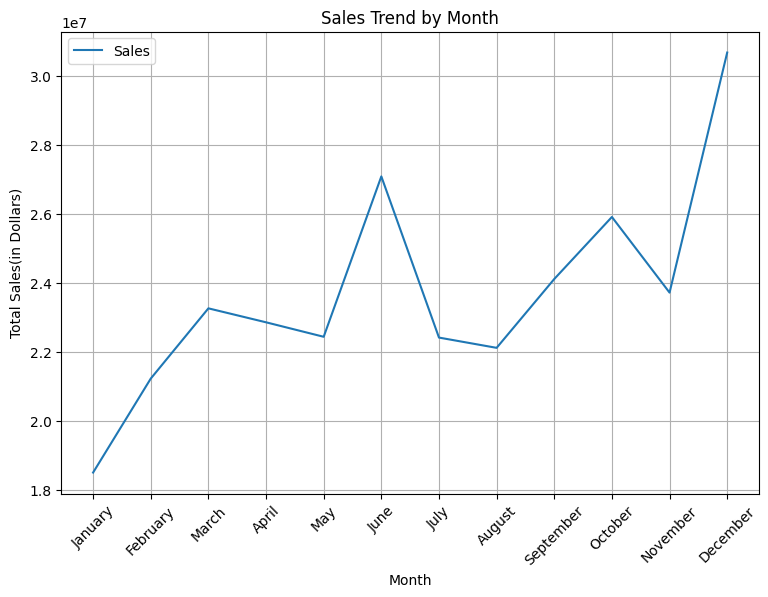

In [18]:
plot2 = pd.DataFrame(df_month).plot(figsize=(9,6), grid=True)

plot2.set_ylabel('Total Sales(in Dollars)')
plot2.set_xlabel('Month')
plot2.set_title('Sales Trend by Month')

plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],[x for x in month_order], rotation=45)

plt.show()

### The top Liquor Categories by Sales:

In [19]:
df_liq= pd.DataFrame(df1.set_index('Invoice').groupby(['Category Name'])['Sales'].sum().sort_values(ascending=True))
df_liq=df_liq.tail(10)

Text(0.5, 1.0, 'Top Categories of Liquor by Sales')

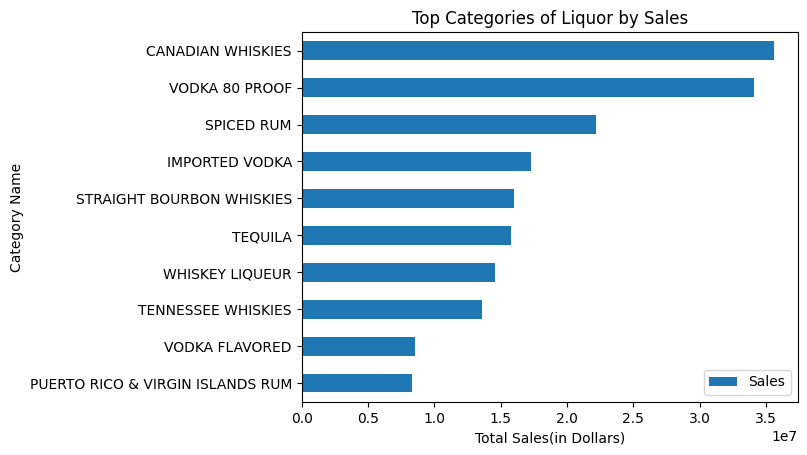

In [20]:
df_liq.plot.barh()
plt.xlabel('Total Sales(in Dollars)')
plt.title('Top Categories of Liquor by Sales')

### Top Vendors: 

In [21]:
df2= pd.DataFrame(df1.set_index('Invoice').groupby(['Vendor Name'])['Sales'].sum().sort_values(ascending=False))
df2.head(10)

,Sales
Vendor Name,
Diageo Americas,63235279.04
Jim Beam Brands,22269952.62
Pernod Ricard USA/Austin Nichols,20828279.54
Brown-Forman Corporation,19679230.74
Luxco-St Louis,18103656.71
"Constellation Wine Company, Inc.",18078849.19
"Sazerac Co., Inc.",17647235.38
"Bacardi U.S.A., Inc.",14687846.01
Sazerac North America,10241813.62


### Top 5 cities with highest sales:

In [25]:
df2= pd.DataFrame(df1.set_index('Invoice').groupby(['City'])['Sales'].sum().sort_values(ascending=False))
df2.head()

,Sales
City,
DES MOINES,35548284.41
CEDAR RAPIDS,19842820.67
DAVENPORT,14173548.65
IOWA CITY,10390854.38
WEST DES MOINES,10299595.14


### For further analysis, we will deep dive into December to study the sales pattern, by generating an excel file for importing to Tableau. 

In [ ]:
# Filtering data for December month
df_dec=df1[df1['month']=='December']

In [29]:
#cleaning data before writing to excel file
df_dec=pd.DataFrame(df_dec.set_index('Invoice'))
df_dec=df_dec.drop(columns=['month'])
df_dec.head()

,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,Category,...,Item Number,Item Description,Pack,Bottle_Volume,Bottles Sold,Vol_sold_liters,Vol_sold_gallons,Sales,State_Bottle_Cost,State_Bottle_Retail
Invoice,,,,,,,,,,,,,,,,,,,,,
S29303000019,2015-12-01,3950,Hometown Foods / State Center,120 E MAIN ST,STATE CENTER,50247,"120 E MAIN ST\nSTATE CENTER 50247\n(42.016841,...",48.0,Iowa,1012300.0,...,15626,Jameson,12,750,1,0.75,0.20,22.49,14.99,22.49
S29357800013,2015-12-01,2656,Hy-Vee Food Store / Corning,300 10TH ST,CORNING,51632,"300 10TH ST\nCORNING 51632\n(40.991951, -94.74...",22.0,Clayton,1012300.0,...,15626,Jameson,12,750,2,1.50,0.40,44.98,14.99,22.49
S29357000001,2015-12-01,3959,Hartig Drug Company #8 / University,1600 UNIVERSITY AVE,DUBUQUE,52001,1600 UNIVERSITY AVE\nDUBUQUE 52001\n(42.498324...,31.0,Dubuque,1012300.0,...,15626,Jameson,12,750,3,2.25,0.59,67.47,14.99,22.49
S29356500069,2015-12-01,4209,Wal-Mart 5748 / Grimes,2150 EAST 1ST ST,GRIMES,50111,"2150 EAST 1ST ST\nGRIMES 50111\n(41.688335, -9...",77.0,Polk,1012300.0,...,15626,Jameson,12,750,12,9.00,2.38,269.88,14.99,22.49
S29348600024,2015-12-01,4589,Dyno's #53 / Sibley,1026 2nd AVE,SIBLEY,51249,"1026 2nd AVE\nSIBLEY 51249\n(43.39743, -95.752...",72.0,Osceola,1012300.0,...,15626,Jameson,12,750,3,2.25,0.59,67.47,14.99,22.49


In [32]:
#!pip install openpyxl

     -------------------------------------- 242.1/242.1 kB 4.9 MB/s eta 0:00:00


In [34]:
#Writing dataframe to excel to import in Tableau
df_dec.to_excel('dec_tableau1.xlsx')